In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


Convolusional Neural Network

In [2]:
base_dir = '/content/drive/MyDrive/day vs night (2)'

! ls "/content/drive/MyDrive/day vs night (2)"

bahan  training  validation


In [3]:
bahan_dir = os.path.join(base_dir, 'bahan')
training_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
day_dir = os.path.join(bahan_dir, 'day/')
night_dir = os.path.join(bahan_dir, 'night/')

print ('Jumlah Data Train Tiap Kelas')
print ('Total gambar day:', len(os.listdir(day_dir)))
print ('Total gambar night:', len(os.listdir(night_dir)))


Jumlah Data Train Tiap Kelas
Total gambar day: 50
Total gambar night: 50


In [5]:
training_day = os.path.join(training_dir, 'day/')
training_night = os.path.join(training_dir, 'night/')

validation_day = os.path.join(validation_dir, 'day/')
validation_night = os.path.join(validation_dir, 'night/')

In [6]:
import random
from shutil import copyfile

def training_validation_split(source, training, validation, training_ratio):
  total_size = len(os.listdir(source))
  training_size = int(total_size * training_ratio)
  validation_size = total_size - training_size

  randomized = random.sample(os.listdir(source), total_size)
  training_files = randomized[0:training_size]
  validation_files = randomized[training_size:total_size]

  for i in training_files:
    i_file = source + i
    destination = training + i
    copyfile(i_file, destination)

  for i in validation_files:
    i_file = source + i
    destination = validation + i
    copyfile(i_file, destination)

training_ratio = 0.9

source_00 = day_dir
training_00 = training_day
validation_00 = validation_night
training_validation_split(source_00, training_00, validation_00, training_ratio)

source_01 = night_dir
training_01 = training_night
validation_01 = validation_night
training_validation_split(source_01, training_01, validation_01, training_ratio)

In [7]:
print('Jumlah All Seratus :', len(os.listdir(day_dir)))
print('Jumlah Train Day  :', len(os.listdir(training_day)))
print('Jumlah Val Day   :', len(os.listdir(validation_day)))

Jumlah All Seratus : 50
Jumlah Train Day  : 50
Jumlah Val Day   : 0


In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

In [10]:
training_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

Found 100 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\nAkurasi mencapai 99%')
            self.model.stop_training = True

callbacks = myCallback()

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),

    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),

    tf.keras.layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss = 'categorical_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])

In [15]:
history = model.fit(
    training_generator,
    steps_per_epoch=10,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5578 - loss: 0.6380 - val_accuracy: 0.4000 - val_loss: 1.5992
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 522ms/step - accuracy: 0.8739 - loss: 0.3614 - val_accuracy: 0.5000 - val_loss: 2.2868
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9707 - loss: 0.1011
Akurasi mencapai 99%
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 562ms/step - accuracy: 0.9725 - loss: 0.0980 - val_accuracy: 0.3000 - val_loss: 6.9860


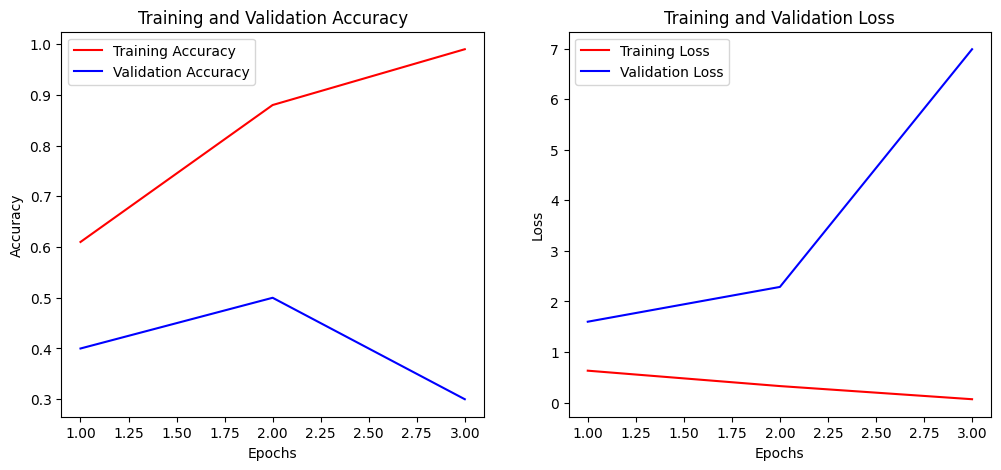

In [16]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """Fungsi untuk memplot akurasi dan loss selama training."""

    acc = history.history.get('accuracy', history.history.get('acc', []))
    val_acc = history.history.get('val_accuracy', history.history.get('val_acc', []))
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)


Saving 25.jpg to 25.jpg


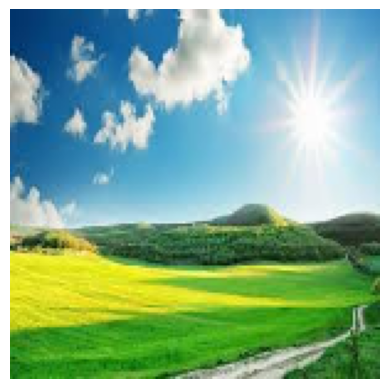

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Prediksi: This is a Day


In [17]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

class_list = ["Day", "Night"]

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    classes = model.predict(x)

    if classes.shape[1] == 2:
        predicted_class = np.argmax(classes, axis=1)[0]
    else:
        predicted_class = int(classes[0][0] > 0.5)

    print(f"Prediksi: This is a {class_list[predicted_class]}")